In [5]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
sys.path.append("/projects/b1198/epifluidlab/ravi/0130/headneck/scripts")
from loaders import HNSCCFeatureHandler
hc_data = HNSCCFeatureHandler("/projects/b1198/epifluidlab/ravi/0130/headneck/metadata/RAW_HNSCC_METADATA.csv", "/projects/b1198/epifluidlab/ravi/0130/headneck/notebooks/lists/valid_ids.txt")

In [6]:
_ = hc_data.load_feature_to_dataframe("/projects/b1198/epifluidlab/ravi/0130/headneck/data/hg38_frag_filtered/*.hg38.frag.delfi.bed", 1, 12)
t = hc_data.normalize_zscore()
_ = hc_data.merge_feature_metadata()

In [7]:
scaler=StandardScaler()
raw_data = hc_data.get_raw_features()
institute = hc_data.get_metadata_col("Institute")

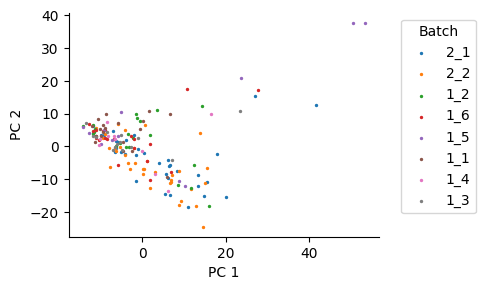

In [9]:
batch = hc_data.get_metadata_col("Batches")
X = raw_data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)  
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df.index = X.index
pca_df['Batches'] = batch
pca_df['Batches'] = pca_df['Batches']
unique_batches = pca_df['Batches'].unique()
colors = sns.color_palette("tab10", len(unique_batches))
color_map = {batch: colors[i] for i, batch in enumerate(unique_batches)}
plt.figure(figsize=(5, 3))
for batch_l, color in color_map.items():
    subset = pca_df[pca_df['Batches'] == batch_l]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=batch_l, s=2)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.ylim(-10, 10)
plt.legend(title='Batch', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks([])
#plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.tight_layout()
plt.savefig("BATCH_COV_PCA_BEFORE_BC.png", dpi=1000)
plt.show()

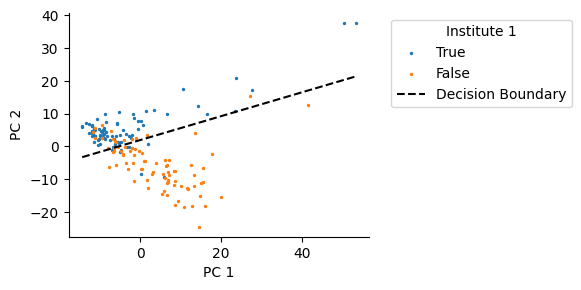

In [10]:
X = raw_data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)  
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df.index = X.index
pca_df['Institute'] = institute
pca_df['Institute'] = pca_df['Institute'] == 1
unique_institutes = pca_df['Institute'].unique()
colors = sns.color_palette("tab10", len(unique_institutes))
color_map = {institute: colors[i] for i, institute in enumerate(unique_institutes)}
clf = LogisticRegression()
clf.fit(pca_df[['PC1', 'PC2']], pca_df['Institute'])
x_values = np.linspace(pca_df['PC1'].min(), pca_df['PC1'].max(), 100)
y_values = -(clf.coef_[0][0] * x_values + clf.intercept_[0]) / clf.coef_[0][1]
plt.figure(figsize=(6, 3))
for institute_l, color in color_map.items():
    subset = pca_df[pca_df['Institute'] == institute_l]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=institute_l, s=2)
plt.plot(x_values, y_values, 'k--', label="Decision Boundary")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.ylim(-10, 10)
plt.legend(title='Institute 1', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks([])
#plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.tight_layout()
plt.savefig("INSTITUTE_COV_PCA_BEFORE_BC_WITH_BOUNDARY.png", dpi=1000)
plt.show()
decision_boundary_y = -(clf.coef_[0][0] * pca_df['PC1'] + clf.intercept_[0]) / clf.coef_[0][1]
pca_df['institute_corrected'] = pca_df['PC2'] > decision_boundary_y
hc_data.metadata['Institute_Corrected']=pca_df['institute_corrected']

In [11]:
raw_data = hc_data.get_raw_features()
pilot = hc_data.get_metadata_col("Pilot")

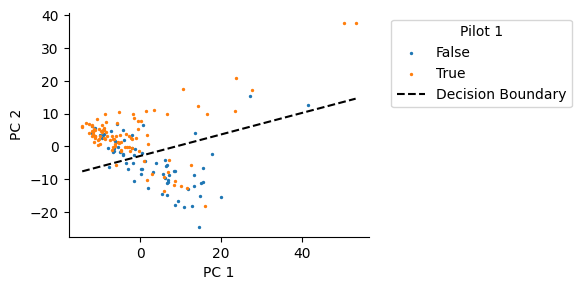

In [13]:
X = raw_data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)  
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df.index = X.index
pca_df['Pilot'] = pilot
pca_df['Pilot'] = pca_df['Pilot'] == 1
unique_pilots = pca_df['Pilot'].unique()
colors = sns.color_palette("tab10", len(unique_pilots))
color_map = {pilot: colors[i] for i, pilot in enumerate(unique_pilots)}
clf = LogisticRegression()
clf.fit(pca_df[['PC1', 'PC2']], pca_df['Pilot'])
x_values = np.linspace(pca_df['PC1'].min(), pca_df['PC1'].max(), 100)
y_values = -(clf.coef_[0][0] * x_values + clf.intercept_[0]) / clf.coef_[0][1]
plt.figure(figsize=(6, 3))
for pilot_l, color in color_map.items():
    subset = pca_df[pca_df['Pilot'] == pilot_l]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=pilot_l, s=2)
plt.plot(x_values, y_values, 'k--', label="Decision Boundary")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.ylim(-10, 10)
plt.legend(title='Pilot 1', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks([])
#plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.tight_layout()
plt.savefig("PILOT_COV_PCA_BEFORE_BC_WITH_BOUNDARY.png", dpi=1000)
plt.show()
decision_boundary_y = -(clf.coef_[0][0] * pca_df['PC1'] + clf.intercept_[0]) / clf.coef_[0][1]
pca_df['pilot_corrected'] = pca_df['PC2'] > decision_boundary_y
hc_data.metadata['Pilot_Corrected']=pca_df['pilot_corrected']

In [14]:
hc_data.merge_feature_metadata()
hc_data.batch_correct()
raw_data = hc_data.get_raw_features()

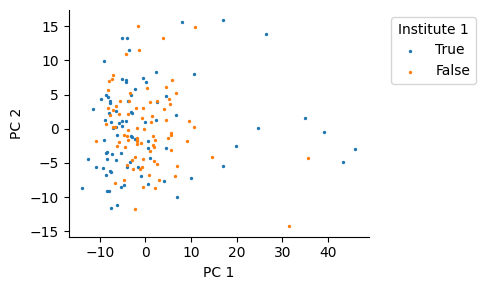

In [15]:
institute = hc_data.get_metadata_col("Institute")
X = raw_data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)  
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df.index=X.index
pca_df['Institute'] = institute
pca_df['Institute'] = pca_df['Institute']==1

unique_institutes = pca_df['Institute'].unique()
colors = sns.color_palette("tab10", len(unique_institutes))
color_map = {institute: colors[i] for i, institute in enumerate(unique_institutes)}

plt.figure(figsize=(5, 3))
for institute_l, color in color_map.items():
    subset = pca_df[pca_df['Institute'] == institute_l]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=institute_l, s=2)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.ylim(-10, 10)
plt.legend(title='Institute 1', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks([])
#plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.tight_layout()
plt.savefig("INSTITUTE_COV_PCA_AFTER_BC.png", dpi=1000)
plt.show()

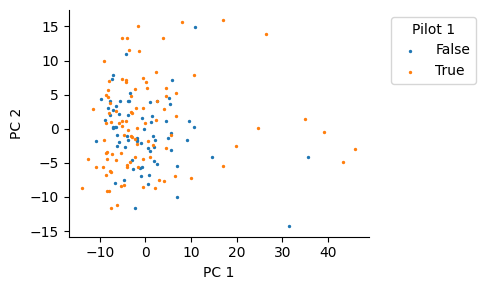

In [16]:
institute = hc_data.get_metadata_col("Pilot")
X = raw_data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)  
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df.index=X.index
pca_df['Institute'] = institute
pca_df['Institute'] = pca_df['Institute']==1

unique_institutes = pca_df['Institute'].unique()
colors = sns.color_palette("tab10", len(unique_institutes))
color_map = {institute: colors[i] for i, institute in enumerate(unique_institutes)}

plt.figure(figsize=(5, 3))
for institute_l, color in color_map.items():
    subset = pca_df[pca_df['Institute'] == institute_l]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=institute_l, s=2)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.ylim(-10, 0.0002)
plt.legend(title='Pilot 1', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks([])
#plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.tight_layout()
plt.savefig("PILOT_COV_PCA_AFTER_BC.png", dpi=1000)
plt.show()

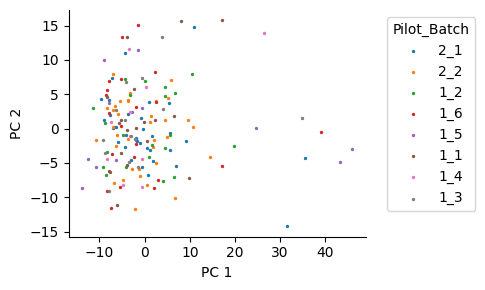

In [17]:
institute = hc_data.get_metadata_col("Batches")
X = raw_data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)  
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df.index=X.index
pca_df['Institute'] = institute
pca_df['Institute'] = pca_df['Institute']

unique_institutes = pca_df['Institute'].unique()
colors = sns.color_palette("tab10", len(unique_institutes))
color_map = {institute: colors[i] for i, institute in enumerate(unique_institutes)}

plt.figure(figsize=(5, 3))
for institute_l, color in color_map.items():
    subset = pca_df[pca_df['Institute'] == institute_l]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=institute_l, s=2)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.ylim(-10, 10)
plt.legend(title='Pilot_Batch', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xticks([])
#plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.tight_layout()
plt.savefig("BATCHES_COV_PCA_AFTER_BC.png", dpi=1000)
plt.show()

In [18]:
responder_screen = hc_data.get_raw_features(hc_data.get_subset(hc_data.responder_ids, hc_data.screen_ids))
non_responder_screen = hc_data.get_raw_features(hc_data.get_subset(hc_data.non_responder_ids, hc_data.screen_ids))
responder_day0 = hc_data.get_raw_features(hc_data.get_subset(hc_data.responder_ids, hc_data.day0_ids))
non_responder_day0 = hc_data.get_raw_features(hc_data.get_subset(hc_data.non_responder_ids, hc_data.day0_ids))
responder_adj_wk1 = hc_data.get_raw_features(hc_data.get_subset(hc_data.responder_ids, hc_data.adjwk1_ids))
non_responder_adk_wk1 = hc_data.get_raw_features(hc_data.get_subset(hc_data.non_responder_ids, hc_data.adjwk1_ids))

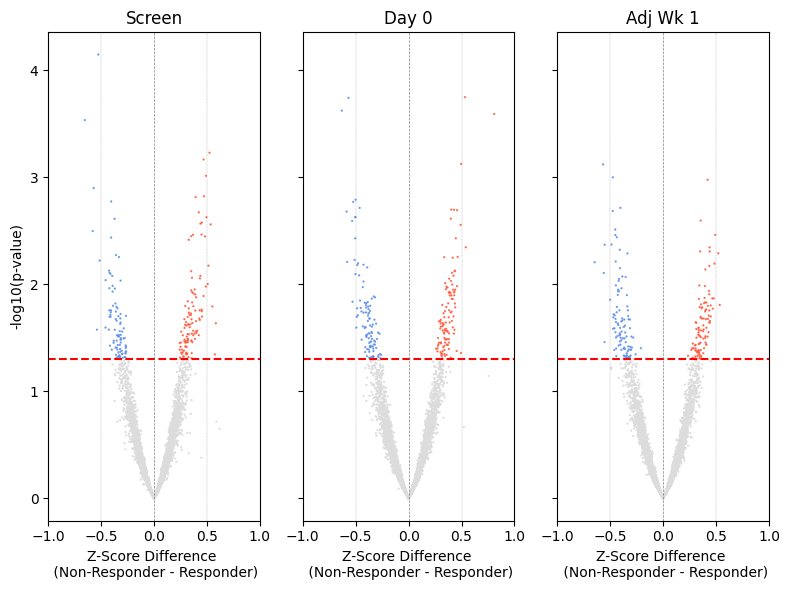

In [19]:
def create_volcano_plot(responder, nonresponder, ax, title, threshold=0.05):
    if set(responder.columns) != set(nonresponder.columns):
        raise ValueError("The columns are not the same between responder and nonresponder.")
    cols = responder.columns
    fold_changes = np.mean(nonresponder, axis=0) - np.mean(responder, axis=0)
    responder = responder.to_numpy()
    nonresponder = nonresponder.to_numpy()
    og_p_values = np.array([
        f_oneway(responder[:, i], nonresponder[:, i]).pvalue
        for i in range(responder.shape[1])
    ])
    volcano_df = pd.DataFrame({
        'FoldChange': fold_changes,
        'PValue': og_p_values
    })
    volcano_df.index=cols
    volcano_df['NegLog10PValue'] = -np.log10(volcano_df['PValue'])
    threshold_log = -np.log10(threshold)
    volcano_df['Color'] = 'gainsboro' 
    volcano_df.loc[
        (abs(volcano_df['FoldChange']) > 0) & (volcano_df['NegLog10PValue'] > threshold_log), 
        'Color'
    ] = volcano_df.apply(
        lambda row: 'cornflowerblue' if row['FoldChange'] < 0 else 'tomato',
        axis=1
    )
    sns.scatterplot(data=volcano_df, x='FoldChange', y='NegLog10PValue', hue='Color', palette={'cornflowerblue': 'cornflowerblue', 'tomato': 'tomato', 'gainsboro': 'gainsboro'},
                    edgecolor=None, s=2, ax=ax)
    ax.axhline(threshold_log, color='red', linestyle='--')
    ax.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
    ax.axvline(x=-0.5, color='gray', linestyle='--', linewidth=0.2)
    ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=0.2)
    ax.set_xlabel('Z-Score Difference \n (Non-Responder - Responder)')
    ax.set_ylabel('-log10(p-value)')
    ax.set_title(title)
    ax.set_xlim(-1, 1)
    ax.legend().remove()
    significant_indices = volcano_df.index[
        (volcano_df['NegLog10PValue'] > threshold_log) & 
        (abs(volcano_df['FoldChange']) > 0)
    ].tolist()
    return significant_indices
fig, axes = plt.subplots(1, 3, figsize=(8, 6), sharey=True)
significant_indices_screen = create_volcano_plot(responder_screen, non_responder_screen, axes[0], 'Screen')
significant_indices_screen = [[s.split(":")[0], int(s.split(":")[1].split("-")[0]), int(s.split(":")[1].split("-")[1])] for s in significant_indices_screen]
df = pd.DataFrame(significant_indices_screen)
df.to_csv("cov_screen.tsv", sep="\t", index=False, header=False)
significant_indices_dayzero = create_volcano_plot(responder_day0, non_responder_day0, axes[1], 'Day 0')
significant_indices_dayzero = [[s.split(":")[0], int(s.split(":")[1].split("-")[0]), int(s.split(":")[1].split("-")[1])] for s in significant_indices_dayzero]
df = pd.DataFrame(significant_indices_dayzero)
df.to_csv("cov_day0.tsv", sep="\t", index=False, header=False)
significant_indices_adjwk1 = create_volcano_plot(responder_adj_wk1, non_responder_adk_wk1, axes[2], 'Adj Wk 1')
significant_indices_adjwk1 = [[s.split(":")[0], int(s.split(":")[1].split("-")[0]), int(s.split(":")[1].split("-")[1])] for s in significant_indices_adjwk1]
df = pd.DataFrame(significant_indices_adjwk1)
df.to_csv("cov_adjwk1.tsv", sep="\t", index=False, header=False)
plt.tight_layout()
plt.savefig('volcano_plot_coverage.png', dpi=1000, bbox_inches='tight')